In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib



In [2]:
# Load training features (X_train) and labels (y_train) from CSV files
X_train = pd.read_csv('../preprocessed/X_train.csv')
y_train = pd.read_csv('../preprocessed/y_train.csv')

# Load testing features (X_test) and labels (y_test) from CSV files
X_test = pd.read_csv('../preprocessed/X_test.csv')
y_test = pd.read_csv('../preprocessed/y_test.csv')

In [3]:
# Create the Logistic Regression model
logreg_model = LogisticRegression(max_iter=20000, verbose=1)  # max_iter to ensure convergence for complex data

# Train the model
logreg_model.fit(X_train, y_train.values.ravel())  # Flatten y_train if it's a DataFrame

# Save the trained model to a file
joblib.dump(logreg_model, 'logreg_model_original.pkl')
print("Model saved to 'logreg_model_original.pkl'")

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.09345D+07    |proj g|=  7.01193D+09


 This problem is unconstrained.



At iterate   50    f=  1.20682D+07    |proj g|=  3.17836D+08

At iterate  100    f=  1.13664D+07    |proj g|=  8.11616D+06

At iterate  150    f=  1.12470D+07    |proj g|=  4.37213D+07

At iterate  200    f=  1.10800D+07    |proj g|=  9.45985D+06

At iterate  250    f=  1.09860D+07    |proj g|=  1.25099D+08

At iterate  300    f=  1.05591D+07    |proj g|=  1.99235D+07

At iterate  350    f=  1.02944D+07    |proj g|=  2.45572D+07

At iterate  400    f=  9.80199D+06    |proj g|=  2.21845D+08

At iterate  450    f=  9.09162D+06    |proj g|=  1.32689D+07

At iterate  500    f=  8.48161D+06    |proj g|=  7.55583D+07

At iterate  550    f=  8.11090D+06    |proj g|=  5.92178D+06

At iterate  600    f=  7.71036D+06    |proj g|=  4.23075D+07

At iterate  650    f=  7.52293D+06    |proj g|=  2.36452D+07

At iterate  700    f=  7.43261D+06    |proj g|=  4.47171D+07

At iterate  750    f=  7.38221D+06    |proj g|=  8.42634D+06

At iterate  800    f=  7.33900D+06    |proj g|=  4.65457D+06

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 57.7min finished


Accuracy: 93.38%


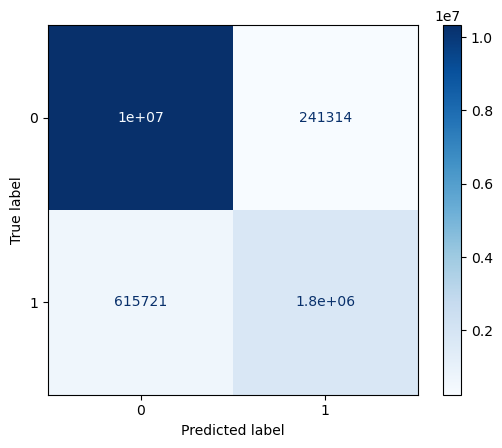

In [4]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_model.classes_)
disp.plot(cmap=plt.cm.Blues)  # You can change the colormap to something else if you like
plt.show()


In [ ]:
#--------------ONLY FOR LOADING MODEL DO NOT RUN------------------------#
# Load the saved model from the file
loaded_model = joblib.load('logreg_model_original.pkl')

# Make predictions with the loaded model
loaded_model_predictions = loaded_model.predict(X_test)
loaded_model_accuracy = accuracy_score(y_test, loaded_model_predictions)
print(f'Loaded model accuracy: {loaded_model_accuracy * 100:.2f}%')